In [2]:
import numpy as np
from collections import Counter

#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)

from numpy.lib.stride_tricks import sliding_window_view as ws_split
from skimage.filters import threshold_otsu


#%matplotlib notebook
#%matplotlib inline
from seaborn import heatmap
import numpy as np
import matplotlib.pyplot as plt

#import sys
#sys.path.append('/content/drive/MyDrive/TesisNotebooks')

from PQmodel import PQ
#from numba import jit

In [2]:
catalog=['Pure sinusoidal [0]', 'Sag[1]', 'Swell[2]','Interruption[3]','Transient/Impulse/Spike[4]',
         'Oscillatory transient [5]','Harmonics[6]','Harmonics with Sag[7]', 'Harmonics with Swell[8]',
         'Flicker[9]', 'Flicker with Sag[10]', 'Flicker with Swell[11]', 'Sag with Oscillatory transient[12]',
         'Swell with Oscillatory transient [13]', 'Sag with Harmonics [14]', 'Swell with Harmonics [15]', 'Notch [16]',
         'Harmonics with Sag with Flicker [17]', 'Harmonics with Swell with Flicker [18]',  'Sag with Harmonics with Flicker [19]',
         'Swell with Harmonics with Flicker [20]', 'Sag with Harmonics with Oscillatory transient [21]',
         'Swell with Harmonics with Oscillatory transient [22]', 'Harmonics with Sag with Oscillatory transient [23]',
         'Harmonics with Swell with Oscillatory transient [24]','Harmonics with Sag with Flicker with Oscillatory transient [25]',
         'Harmonics with Swell with Flicker with Oscillatory transient [26]', 'Sag with Harmonics with Flicker with Oscillatory transient [27]'
         'Swell with Harmonics with Flicker with Oscillatory transient [28]']

In [3]:
Prueba = PQ(Cicles=10,PeriodoDisturbio=10,InicioDisturbio=0,FS=3841)

In [4]:
datos = Prueba.PQaleatorio(100)
datos.shape

(100, 29, 640)

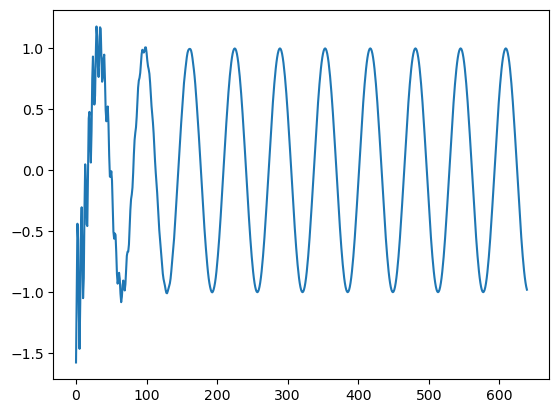

In [5]:
plt.plot(datos[2,5])
plt.show()

In [8]:
def build_data(data,cs=16):
    Muestras,tSenal,LSenal=data.shape
    db,dbl=[],[]
    for j in range(Muestras):
        for k in range (tSenal):
            s = data[j,k]
            sd= ws_split(s,window_shape=cs)
            for iw in range(len(sd)):
                db.append(sd[iw])
                dbl.append(k)

    return np.array(db),np.array(dbl)


In [7]:
def build_dataX(data, k=64,cs=16):
    nsi,m,n=data.shape
    
    k=k#320
    w=k
    db=[]
    dbl=[]
    for u in range (nsi):
        for j in range(1,m-1):
            s = data[u,j]
            sample = (s-np.tile(s[:k],10))
            th = np.abs(sample) > threshold_otsu(np.abs(sample))
            labels=[]
            for i in range(len(s)//w):
                c=Counter(th[i*w:i*w+w])
                ll=[c.get(True,0)!=0 for j in range(w)]
                labels+=ll

            sd,sl= ws_split(s,window_shape=cs),ws_split(labels,window_shape=cs)

            for iw in range(len(sd)):
                db.append(sd[iw])
                if True in sl[iw]:
                    #print(sl[iw])
                    dbl.append(j)
                else:
                    dbl.append(0)
    return np.array(db),np.array(dbl)

In [9]:
dd,target=build_dataX(datos,cs=128)
print(np.bincount(target))


[228437  38400  38400  38400  27558  51296  43520  41664  41408  51116
  51123  51122  34413  35055  41472  39104  16777  51267  51015  51223
  51156  34676  33593  51296  51299  51300  51300  37710]


In [10]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score

model=KNeighborsClassifier()


In [11]:
def cross_val(model, X,y):

    skf=StratifiedKFold(n_splits=5, random_state=33, shuffle=True)
    yo,yp=[],[]
    i=1
    for ti,vi in skf.split(X, y):
        #print(vi.shape,y.shape)
        print(f"Fold: {i}")
        i+=1
        model.fit(X[ti],y[ti])
        yp+=list(model.predict(X[vi]))
        yo+=list(y[vi])
    return np.array(yp), np.array(yo)

In [12]:
yp,yo=cross_val(model,dd,target)

Fold: 1
Fold: 2
Fold: 3
Fold: 4
Fold: 5


In [17]:
np.bincount(target)

array([228437,  38400,  38400,  38400,  27558,  51296,  43520,  41664,
        41408,  51116,  51123,  51122,  34413,  35055,  41472,  39104,
        16777,  51267,  51015,  51223,  51156,  34676,  33593,  51296,
        51299,  51300,  51300,  37710])

In [18]:
cm=confusion_matrix(yo,yp)

In [19]:
f1_score(yo,yp,average='weighted')

0.7536646848928312

<Axes: >

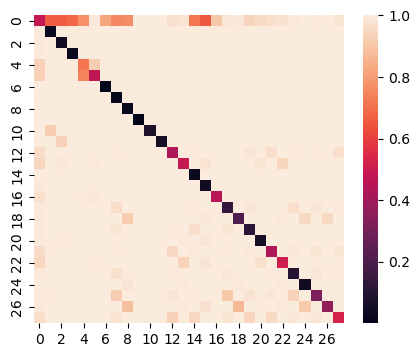

In [20]:
fig, ax = plt.subplots(figsize=(5,4))
heatmap(1-cm/np.bincount(target), ax=ax)

In [60]:
!pip install pyclustertend==1.4.0

In [61]:
!apt-get install python3.9

from IPython.display import clear_output
clear_output()
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.9 1

# Choose one of the given alternatives:
!sudo update-alternatives --config python3

# This one used to work but now NOT(for me)!
# !sudo update-alternatives --config python

# Check the result
!python3 --version

# Attention: Install pip (... needed!)
!sudo apt install python3-pip

Password:
sudo: a password is required
Password:

In [ ]:
!pip --version

Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 5, in <module>
    from pip._internal.cli.main import main
  File "/usr/lib/python3/dist-packages/pip/_internal/cli/main.py", line 9, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/usr/lib/python3/dist-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/usr/lib/python3/dist-packages/pip/_internal/cli/main_parser.py", line 8, in <module>
    from pip._internal.cli import cmdoptions
  File "/usr/lib/python3/dist-packages/pip/_internal/cli/cmdoptions.py", line 23, in <module>
    from pip._internal.cli.parser import ConfigOptionParser
  File "/usr/lib/python3/dist-packages/pip/_internal/cli/parser.py", line 12, in <module>
    from pip._internal.configuration import Configuration, ConfigurationError
  File "/usr/lib/python3/dist-packages/pip/_internal/configuration.py", line 26, in <module>
    f

In [ ]:
!pip install numba

Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 5, in <module>
    from pip._internal.cli.main import main
ModuleNotFoundError: No module named 'pip'


In [ ]:
!sudo apt install python3-pip

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following packages were automatically installed and are no longer required:
  libpython2-stdlib libpython2.7-minimal libpython2.7-stdlib
  python-pkg-resources python-setuptools python2 python2-minimal python2.7
  python2.7-minimal
Use 'sudo apt autoremove' to remove them.
The following packages will be REMOVED:
  python-pip
The following NEW packages will be installed:
  python3-pip
0 upgraded, 1 newly installed, 1 to remove and 18 not upgraded.
Need to get 1,305 kB of archives.
After this operation, 2,151 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 python3-pip all 22.0.2+dfsg-1ubuntu0.3 [1,305 kB]
Fetched 1,305 kB in 0s (11.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.p

In [ ]:
!sudo apt install python3-pip

Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 5, in <module>
    from pip._internal.cli.main import main
ModuleNotFoundError: No module named 'pip'


In [ ]:
|#import the packages
import pandas as pd # working with data
import numpy as np # working with arrays
from pyclustertend import vat
from pyclustertend import ivat

SyntaxError: ignored